In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import du dataset

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploration des données

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.dropna(subset=['Age', 'Embarked'], inplace=True)
df.drop(['Cabin', 'Name', 'Ticket', 'Embarked'], inplace=True, axis = 1)

# Visualisation des données

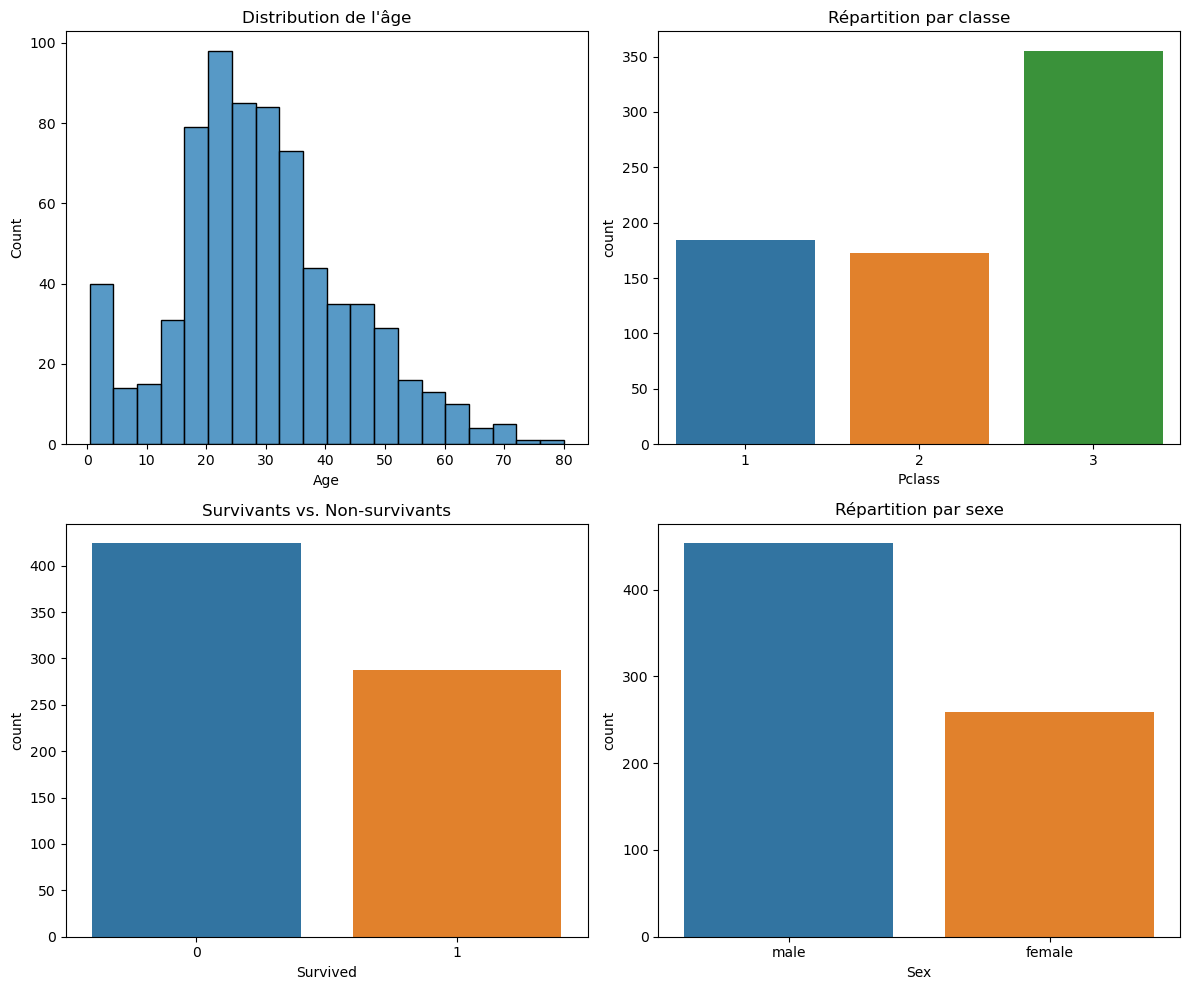

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution de l\'âge')

sns.countplot(data=df, x='Pclass', ax=axes[0, 1])
axes[0, 1].set_title('Répartition par classe')

sns.countplot(data=df, x='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Survivants vs. Non-survivants')

sns.countplot(data=df, x='Sex', ax=axes[1, 1])
axes[1, 1].set_title('Répartition par sexe')

plt.tight_layout()

plt.show()


# Séparation des données

In [8]:
data = df.drop(['Survived'], axis=1)
target = df['Survived']

data['Sex'] = data['Sex'].replace({'female': 0, 'male': 1})

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.2, random_state= 42)

# Entrainement d'un SVC

In [10]:
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [11]:
y_pred = svc.predict(X_test)

In [12]:
accuracy_svc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svc)

# Autres métriques de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.7482517482517482
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        80
           1       0.76      0.62      0.68        63

    accuracy                           0.75       143
   macro avg       0.75      0.73      0.74       143
weighted avg       0.75      0.75      0.74       143

Confusion Matrix:
[[68 12]
 [24 39]]


# GridSearchCV for SVC

In [13]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}


In [14]:
svc = SVC()


In [15]:
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

In [16]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [17]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score:", best_score)

Meilleurs hyperparamètres: {'C': 10, 'kernel': 'linear'}
Meilleur score: 0.7925943176525384


In [18]:
best_svc = grid_search.best_estimator_
y_pred_best_svc = best_svc.predict(X_test)

In [19]:
accuracy_best_svc = accuracy_score(y_test, y_pred_best_svc)
print("Accuracy:", accuracy_best_svc)

# Autres métriques de classification
print(classification_report(y_test, y_pred_best_svc))

# Matrice de confusion
confusion = confusion_matrix(y_test, y_pred_best_svc)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.7762237762237763
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        80
           1       0.92      0.54      0.68        63

    accuracy                           0.78       143
   macro avg       0.82      0.75      0.75       143
weighted avg       0.81      0.78      0.76       143

Confusion Matrix:
[[77  3]
 [29 34]]


# Random Forest Classifier

## Instanciation du modèle

In [20]:
random_forest = RandomForestClassifier(n_estimators=100, random_state= 42)

## Entrainement du modèle

In [21]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation du modèle

In [22]:
rfc_pred = random_forest.predict(X_test)

In [26]:
accuracy_rfc = accuracy_score(y_test, rfc_pred)
print("Précision :", accuracy_rfc)

Précision : 0.7972027972027972


## Recherche des meilleurs hyperparamètres

In [27]:
param_grid_rfc = {
    'n_estimators': [50, 100, 200],              # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],            # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],           # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],             # Nombre minimum d'échantillons requis dans une feuille
    'bootstrap': [True, False],                 # Si les échantillons sont bootstrapés ou non
    'criterion': ['gini', 'entropy']           # Critère de fraction : 'gini' ou 'entropy'
}


In [28]:
grid_search_rfc = GridSearchCV(estimator=random_forest, param_grid=param_grid_rfc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rfc.fit(X_train, y_train)

# Meilleures combinaisons d'hyperparamètres
best_params = grid_search.best_params_


In [29]:
best_params_rfc = grid_search_rfc.best_params_
best_score_rfc = grid_search_rfc.best_score_

print("Meilleurs hyperparamètres:", best_params_rfc)
print("Meilleur score:", best_score_rfc)

Meilleurs hyperparamètres: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Meilleur score: 0.8295451016922838


In [30]:
best_rfc = grid_search_rfc.best_estimator_
y_pred_best_rfc = best_rfc.predict(X_test)

In [31]:
accuracy_best_rfc = accuracy_score(y_test, y_pred_best_rfc)
print("Accuracy:", accuracy_best_rfc)

# Autres métriques de classification
print(classification_report(y_test, y_pred_best_rfc))

# Matrice de confusion
confusion_best_rfc = confusion_matrix(y_test, y_pred_best_rfc)
print("Confusion Matrix:")
print(confusion_best_rfc)


Accuracy: 0.7972027972027972
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143

Confusion Matrix:
[[73  7]
 [22 41]]


# Gradient Boosting Classifier

## Exploration des meilleurs paramètres

In [32]:
gbc = GradientBoostingClassifier()

param_grid_gbc = {
    'n_estimators': [50, 100, 200],             # Nombre d'arbres dans le gradient boosting
    'learning_rate': [0.01, 0.1, 0.2],         # Taux d'apprentissage (learning rate)
    'max_depth': [3, 4, 5],                    # Profondeur maximale des arbres
    'min_samples_split': [2, 3, 4],            # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 3],             # Nombre minimum d'échantillons requis dans une feuille
    'subsample': [0.8, 0.9, 1.0],              # Fraction d'échantillons à utiliser pour l'apprentissage de chaque arbre
    'random_state': [42]}  

grid_search_gbc = GridSearchCV(estimator=gbc,
                               param_grid=param_grid_gbc,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)

grid_search_gbc.fit(X_train, y_train)

best_params = grid_search_gbc.best_params_

In [33]:
best_params_gbc = grid_search_gbc.best_params_
best_score_gbc = grid_search_gbc.best_score_

print("Meilleurs hyperparamètres:", best_params_gbc)
print("Meilleur score:", best_score_gbc)

Meilleurs hyperparamètres: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42, 'subsample': 0.9}
Meilleur score: 0.8224499301350722


In [34]:
best_gbc = grid_search_gbc.best_estimator_
y_pred_best_gbc = best_gbc.predict(X_test)

In [35]:
print(len(y_test))
print(len(y_pred_best_gbc))

143
143


In [36]:
accuracy_best_gbc = accuracy_score(y_test, y_pred_best_gbc)
print("Accuracy:", accuracy_best_gbc)

# Autres métriques de classification
print(classification_report(y_test, y_pred_best_gbc))

# Matrice de confusion
confusion_best_gbc = confusion_matrix(y_test, y_pred_best_gbc)
print("Confusion Matrix:")
print(confusion_best_gbc)


Accuracy: 0.7972027972027972
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.84      0.67      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.80      0.80      0.79       143

Confusion Matrix:
[[72  8]
 [21 42]]


# Stratified K-Fold

In [37]:
from sklearn.model_selection import StratifiedKFold

# Créez un objet StratifiedKFold
n_splits = 5  # Par exemple, 5 plis
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Bouclez à travers les plis
for train_index, test_index in stratified_kfold.split(data, target):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]  # Utilisez .iloc pour accéder aux données par les indices
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    # Entraînez votre modèle sur X_train et y_train
    # Évaluez le modèle sur X_test et y_test


In [38]:
pred_gbc = best_gbc.predict(X_test)
pred_rfc = best_rfc.predict(X_test)

In [40]:
accuracy_best_gbc_2 = accuracy_score(y_test, pred_gbc)
accuracy_best_rfc_2 = accuracy_score(y_test,pred_rfc)

print("Accuracy GBC 2:", accuracy_best_gbc_2)
print("Accuracy RFC 2:", accuracy_best_rfc_2)


Accuracy GBC 2: 0.9507042253521126
Accuracy RFC 2: 0.9366197183098591


# Comparaison des modèles

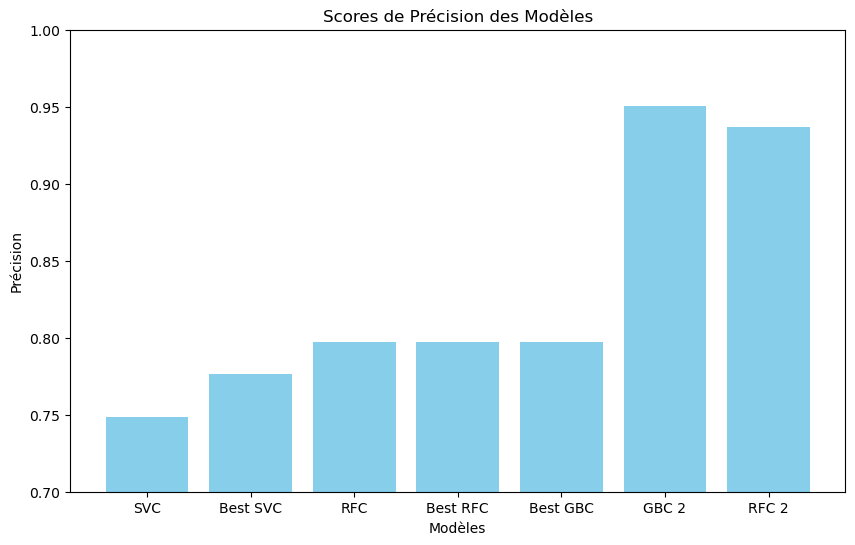

In [45]:
modeles = ["SVC", "Best SVC", "RFC", "Best RFC", "Best GBC", "GBC 2", "RFC 2"]
scores = [accuracy_svc, accuracy_best_svc, accuracy_rfc, accuracy_best_rfc, accuracy_best_gbc, accuracy_best_gbc_2, accuracy_best_rfc_2]

# Créez le graphique à barres
plt.figure(figsize=(10, 6))  # Facultatif : définir la taille du graphique
plt.bar(modeles, scores, color='skyblue')

# Ajoutez des étiquettes et un titre
plt.xlabel('Modèles')
plt.ylabel('Précision')
plt.title('Scores de Précision des Modèles')

plt.ylim(0.7, 1.0)

# Affichez le graphique
plt.show()

In [43]:
len(scores)

8